In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [2]:
fashion_df = pd.read_csv('data/fashion_train.csv')

In [3]:
fashion_df.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4


In [5]:
fashion_df.shape

(1000, 785)

##### There are 1000 images of different categories, 28*28 pixels each. 

In [8]:
#setting up the lookup for label y in the dataset
LOOKUP = {0: 'T-shirt', 
         1: 'Trouser',
         2: 'Pullover',
         3: 'Dress',
         4: 'Coat',
         5: 'Sandal',
         6:'Shirt',
         7: 'Sneakers',
         8: 'Bag',
         9: 'Ankle Boot'}


In [33]:
def display_image(features, actual_label):
    '''
    feature should be an ndarray of atleast 28*28
    label should an int in range of 0 to 9'''
    print("Actual_label :", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [ ]:
X = fashion_df[]

In [20]:
x_train = fashion_df[fashion_df.columns[:-1]]
y_train = fashion_df['y']

In [22]:
x_train.shape, y_train.shape

((1000, 784), (1000,))

In [24]:
y_train.unique()

array([6, 9, 4, 1, 7, 5, 8, 0, 3, 2])

Actual_label : Shirt


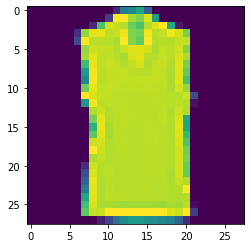

In [34]:
display_image(features=x_train.loc[5].values, actual_label=y_train.loc[5])

Actual_label : Shirt


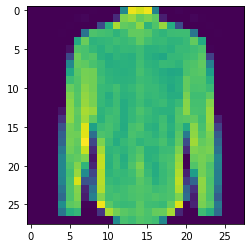

In [35]:
display_image(features=x_train.loc[15].values, actual_label=y_train.loc[15])

Actual_label : Sneakers


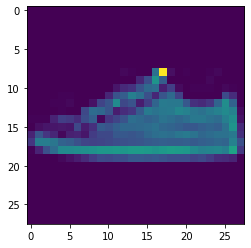

In [38]:
display_image(features=x_train.loc[150].values, actual_label=y_train.loc[150])

Actual_label : Dress


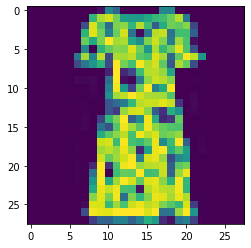

In [39]:
display_image(features=x_train.loc[185].values, actual_label=y_train.loc[185])

In [40]:
#normalize the values 
x_train = x_train/255

In [41]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086275,...,0.192157,0.0,0.0,0.003922,0.000000,0.000000,0.011765,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.003922,0.0,0.0,0.356863,0.380392,0.313725,0.305882,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.007843,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.082353,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [42]:
test_df = pd.read_csv('data/fashion_test.csv')

In [43]:
test_df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,1,3,2,0,0,...,0,0,135,117,25,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,11,...,0,0,0,147,162,104,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,20,3,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,229,215,175,145,5,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [45]:
x_test = test_df[fashion_df.columns[:-1]]/255
y_test = test_df['y']

In [46]:
x_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.003922,0.011765,0.007843,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.529412,0.458824,0.098039,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043137,...,0.000000,0.000000,0.000000,0.000000,0.576471,0.635294,0.407843,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.227451,0.078431,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.898039,0.898039,0.843137,0.686275,0.568627,0.019608,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.141176,0.388235,0.309804,...,0.266667,0.282353,0.321569,0.235294,0.035294,0.494118,0.400000,0.333333,0.372549,0.164706
997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
def summ_clf(y_test, y_pred, avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred, average=avg_method)
    rec = recall_score(y_test, y_pred, average=avg_method)
    print('Total data count :', len(y_test))
    print('test data count :', num_acc)
    print('precision score :', prec)
    print('accuracy_score: ', acc)
    print('recall_score: ', rec)

In [48]:
clf = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [50]:
y_pred = clf.predict(x_test)

y_pred[:5]

array([2, 2, 3, 0, 9])

Actual_label : Dress


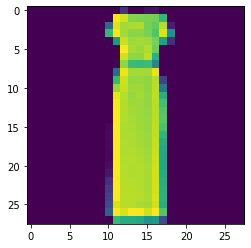

In [55]:
display_image(x_test.loc[50].values,y_pred[50])

In [54]:
LOOKUP[y_test[50]]

'Dress'

In [58]:
summ_clf(y_test, y_pred)

Total data count : 1000
test data count : 802
precision score : 0.8042936299736955
accuracy_score:  0.802
recall_score:  0.802


##### The end